# Descripción del Proyecto 13

# La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

# Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

# Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

# En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

# Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

# Tienes que:

# Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
# Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
# Analizar los factores que más impactan la pérdida.
# Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
# identificar a los grupos objetivo;
# sugerir medidas para reducir la rotación;
# describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

# Importar librerias

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Paso 1. Descargar los datos

In [16]:
df_gym = pd.read_csv('/datasets/gym_churn_us.csv', sep=',')
print(df_gym.head(10))

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1        

In [17]:
df_gym.info()
df_gym.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Todas las columnas tienen 4000 valores no nulos, significa que no hay valores ausentes en el dataset df_gym. / Los tipos de datos int64 y float64 en las columnas son los indicados para el procesamiento de los datos. / Los valores min y max como 0 y 1, o rangos específicos para Contract_period nos confirman que son categóricas o discretas, las medias nos dan una idea de la distribución de estas categorías por ejemplo el 51 % son gender=1, el 84.5 % vive cerca Near_Location=1, son buenos datos. / Variables numericas continuas, Age tiene un rango de 18 a 41 años, con una media de 29.18 años, parece ser una distribución razonable. / Avg_additional_charges_total tiene una desviación estándar de 96.35 con un mínimo cercano a cero y un máximo de 552, podria referirse a la presencia de valores atípicos o simplemente que algunos clientes gastan mucho más que otros, habria que ver su distribución en un histograma. / La columnas Avg_class_frequency_total y Avg_class_frequency_current_month ambas tienen rangos que van desde 0 hasta aproximadamente 6 visitas por semana, con desviaciones estándar cercanas a 1, esto podria indicar cierta variabilidad y sus similitud entre sus medias y desviaciones estándar sugiere que la frecuencia de visita actual no difiere drásticamente de la frecuencia total, aunque esto lo podriamos explorar a fondo durante el proyecto. / La columna Churn, nos muestra que la media de 0.265250 significa que aproximadamente el 26.5% de los clientes del dataset se dieron de baja en el mes siguiente, una tasa considerable y es la variable objetivo que se busca para predecir. 
</div>

In [18]:
df_gym.columns = df_gym.columns.str.lower()
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

# Llevar a cabo el análisis exploratorio de datos (EDA)

# Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [19]:
churn_mean_comparison = df_gym.groupby('churn').mean()

print(churn_mean_comparison)

# Diferencias significativas entre clientes donde los que se quedan churn = 0 y los que se van churn = 1.

         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.0

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
En near_location se quedaron el 87 % vive o trabaja cerca y se fueron el 77 % Aunque la mayoría de los clientes viven cerca, los que se quedaron tienen más probabilidades de estar más cerca del gimnasio, la diferencia del 10% es notable, podria mostrar que es conveniente. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
En la columna partner se quedo el 53 % que trabaja en empresas asociadas y se fue el 36 % mostrando que los que trabajan en empresas asociadas son significativamente más leales, lo cual puede ser obvio ya que se benefician de descuentos o programas corporativos, esto nos ratifica que los incentivos o afiliaciones son factores fuertes de retención.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para promo_friends se quedo solo el 35 % y se fue un 18 %, en esta promoción de "trae a un amigo" tiene una doble de probabilidades de quedarse, la importancia de la conexión social y las referencias en mantener al cliente.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
phone se quedaron el 0.90 y se fueron el 0.90, aqui no muestra ninguna diferencia entre los dos grupos, se podria decir entonces que el hecho de que un cliente haya proporcionado un número de teléfono tiene poco o ningún impacto en la cancelación, aunque por ahora se podria mantener en perfil bajo, ya que no tiene mucha relevancia predictiva.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para contract_period se quedaron 5.75 meses y se fueron 1.73 meses, es un contraste llamativo, teniendo en cuenta que los clientes que se quedan tienden a firmar un contrato mucho más largo, dato sobresaliente para tener en cuenta en los contratos más cortos, pues son un factor de riesgo en las cancelaciónes.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
En group_visits se quedo el 46 % son clientes que participan en visitas grupales tienden a permanecer mas leales que el 27 % que se fue, podria mencionarse que las actividades grupales fomentan un sentido de comunidad y compromiso, volviendolas mucho mas serias y responsables. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para la columna age se quedaron los de 29.98 años y se fueron los de 26.99 años, es en promedio clientes mas jovenes que cancelan, aproximadamente 3 años más jóvenes, se podria manifestar que tienen diferentes necesidades o niveles de compromiso u otro tema en particular. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para avg_additional_charges_total se quedan los que gastan $158.45 mas y se fueron los que gastan  $115.08, en particular los clientes leales gastan más en servicios adicionales, mostrandonos que a mayor compromiso suele desembocar en más compras dentro de las instalaciones del gimnasio, muestra una entrega más profunda que una simple membresía básica. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
month_to_end_contract se quedaron los de 5.28 meses y se fueron los de 1.66 meses, indicador alto, puesto que los clientes que cancelan tienen muy poco tiempo restante en sus contratos, lo que concuerda con la observación dicha en contract_period, es esta tal vez una señal de advertencia crítica para la posible cancelación. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
lifetime nos muestra que se quedaron 4.71 meses contra los que se fueron de 0.99 meses es decir menos de un mes o el mes, sabemos entonces que los clientes leales han estado en el gimnasio mucho más tiempo, mas o menos 5 meses a diferencia de los que cancelan intuitivamente podriamos sugerir que los clientes nuevos o con poca lifetime son mas riesgosos.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para avg_class_frequency_total y avg_class_frequency_current_month se quedaron ~2.02 y se fueron ~1.47 y ~1.04, lo que nos dice que los clientes leales asisten a clases con más frecuencia, pero para los clientes que cancelan, su frecuencia de clases actual es significativamente menor que su frecuencia general, podria decirse entonces que un bajonaso reciente en el compromiso, antes de la cancelación, podria ser una muestra interesante para evaluar!
</div>

# Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

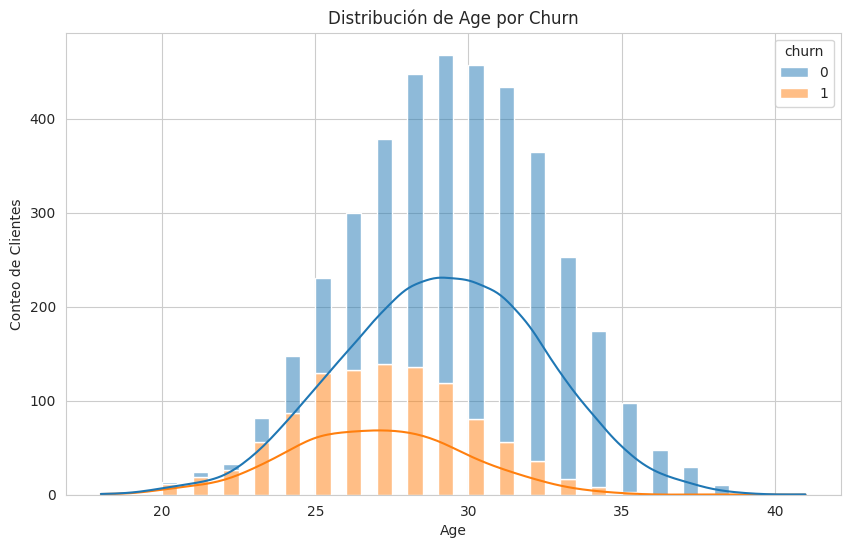

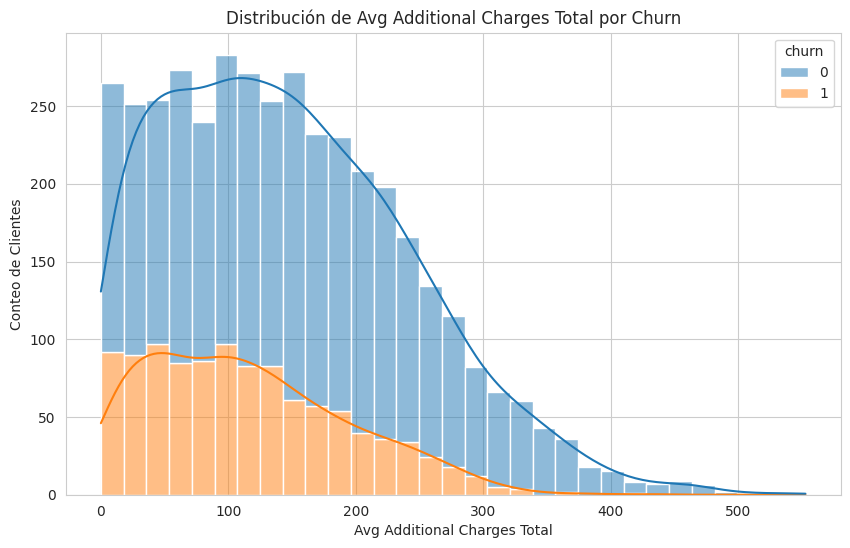

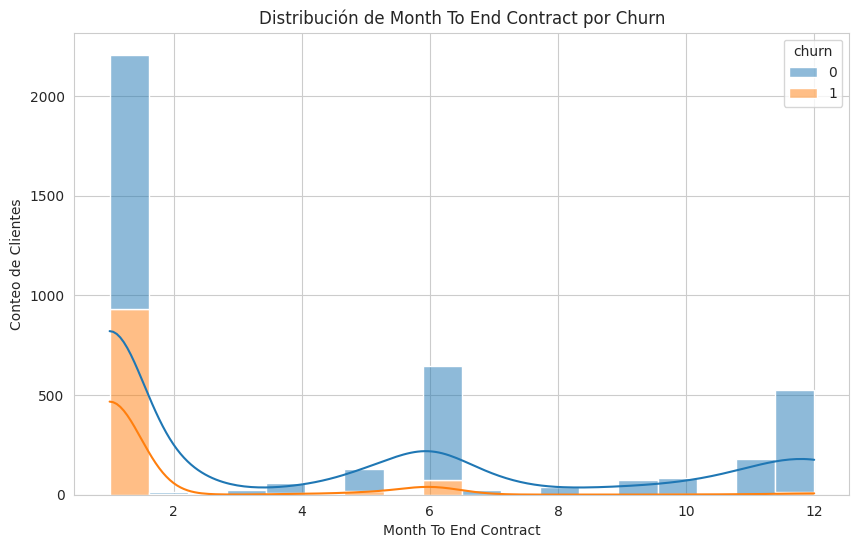

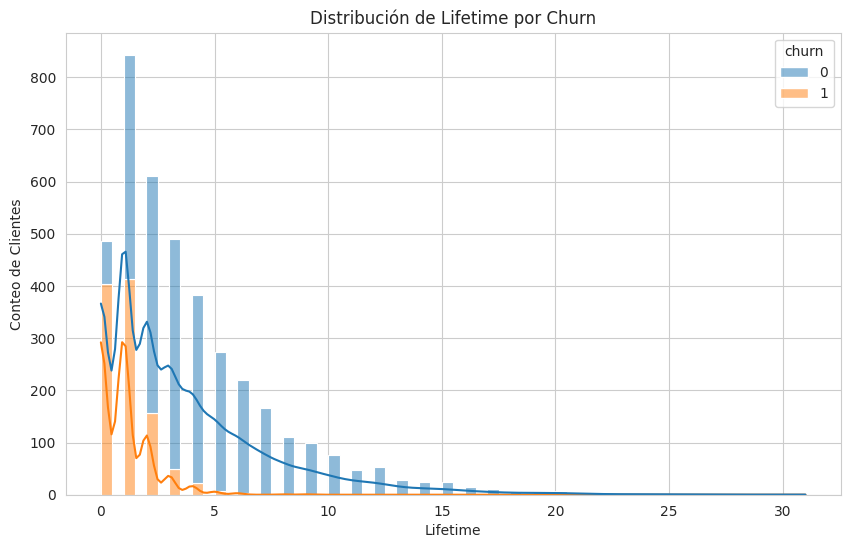

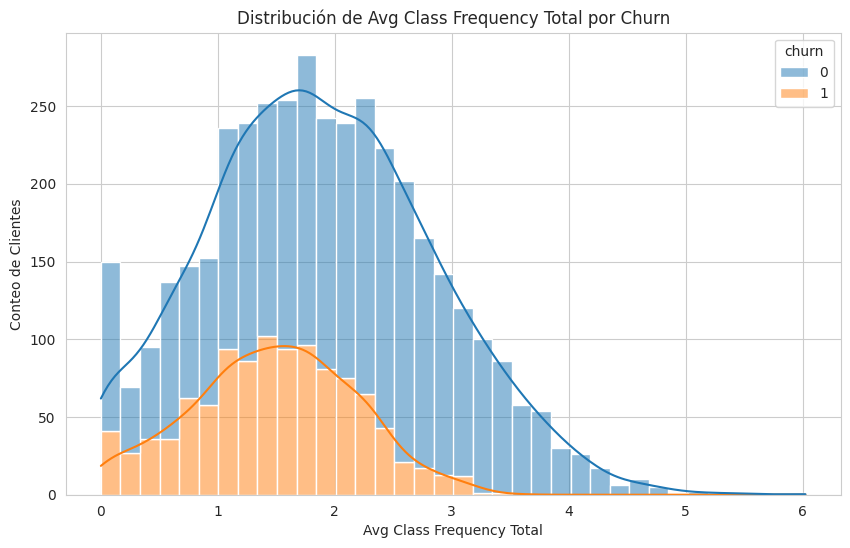

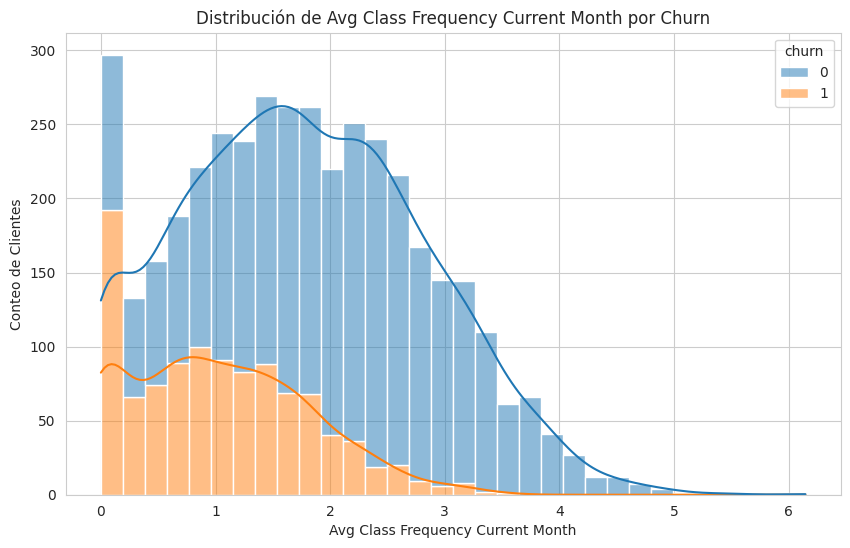

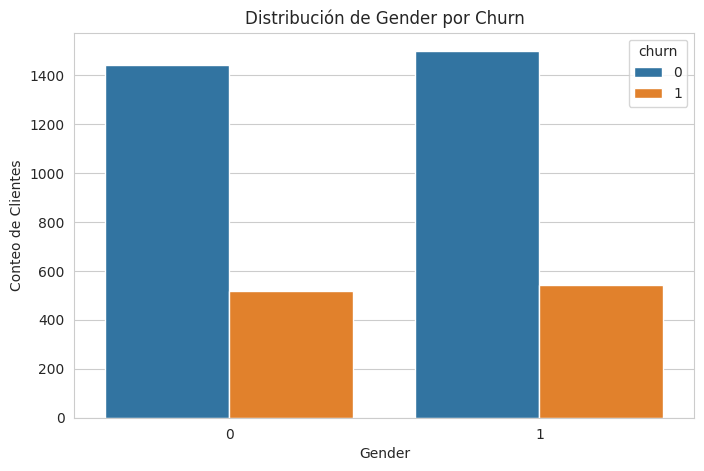

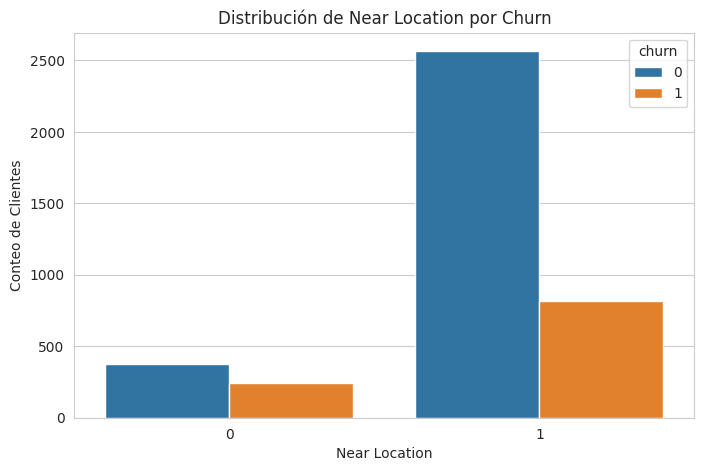

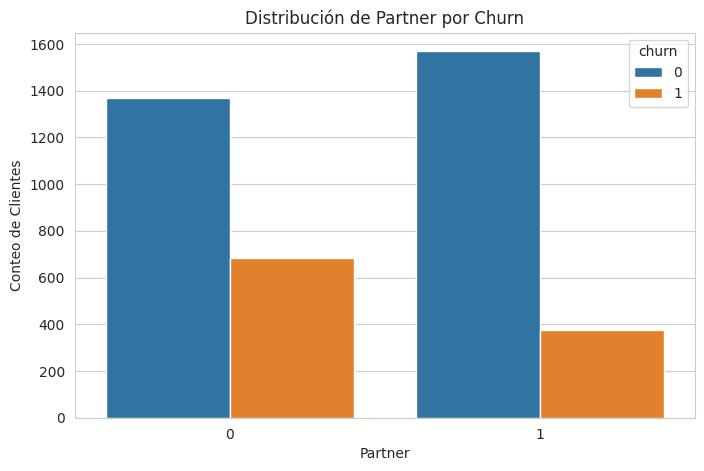

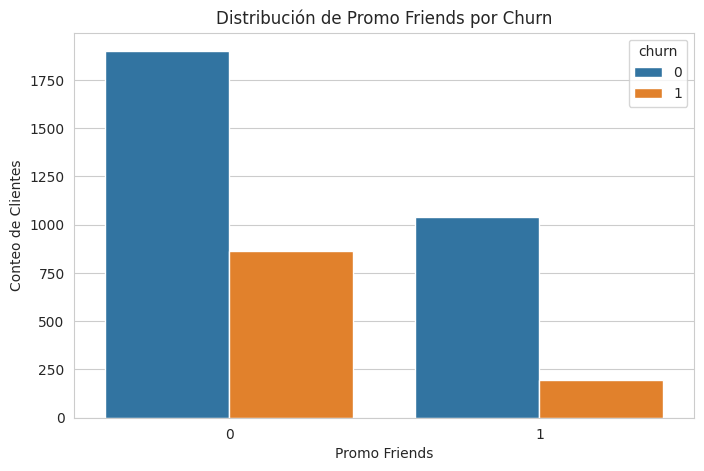

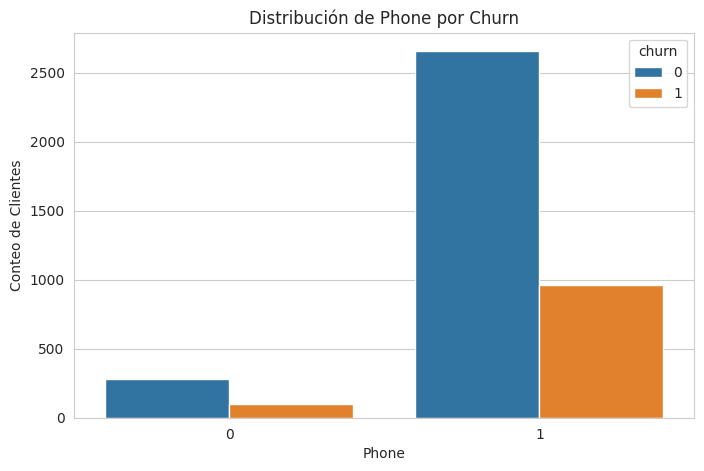

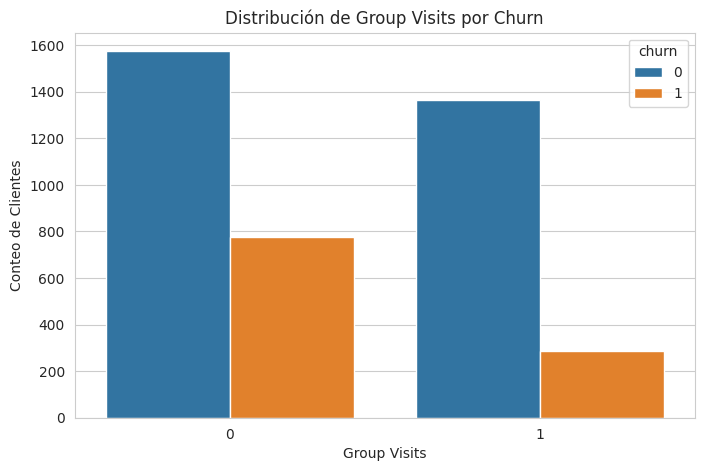

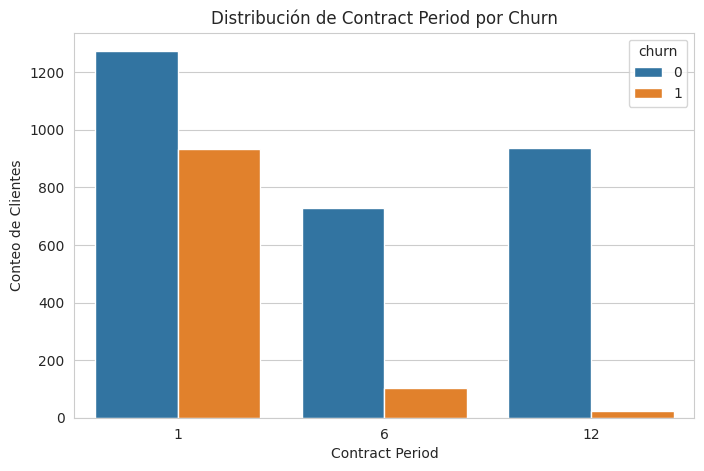

In [20]:
numeric_cols = ['age', 'avg_additional_charges_total', 'month_to_end_contract',
                'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
binary_categorical_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period']


for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_gym, x=col, hue='churn', multiple='stack', kde=True)
    plt.title(f'Distribución de {col.replace("_", " ").title()} por Churn')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Conteo de Clientes')
    plt.show()

for col in binary_categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_gym, x=col, hue='churn')
    plt.title(f'Distribución de {col.replace("_", " ").title()} por Churn')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Conteo de Clientes')
    plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Las características más predictivas  que se pueden ver a traves de estos histogramas y las distribuciones, muestran que los contratos cortos y el poco tiempo restante hasta el final del contrato son enormes señales de riesgo de abandono. / Los clientes que son nuevos o llevan poco tiempo en el gimnasio son los más propensos a irse. / Una frecuencia baja de visitas en el mes actual es un indicador alto de que un cliente está a punto de cancelar. / Las conexiones y los beneficios externos son claves para aumentar la lealtad. / Participar en actividades grupales reduce el riesgo de churn. / Un menor gasto en servicios adicionales se asocia con un mayor riesgo de abandono.
</div>

# Crea una matriz de correlación y muéstrala.

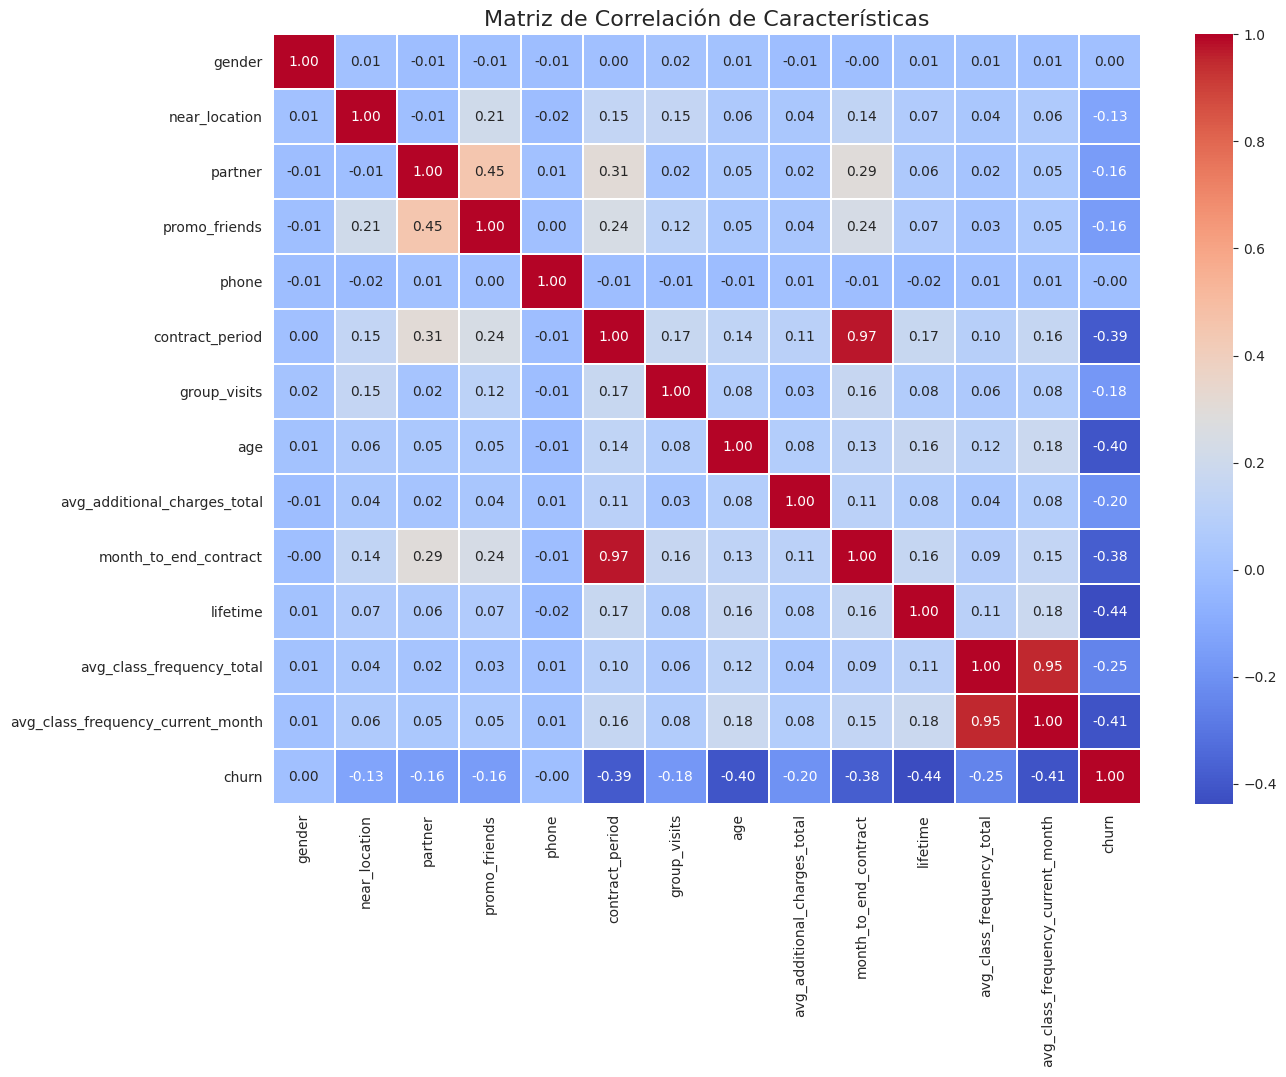

In [21]:
correlation_matrix = df_gym.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Características', fontsize=16)
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Una posible conclusión sobre churn, es que todas las correlaciones negativas fuertes especialmente en lifetime, age, contract_period, month_to_end_contract, y las frecuencias de clase, validarian y le dan fuerza a las posibles hipótesis que se formulan a partir de las medias y los histogramas, es una información clave para el desarrollo del modelo.
</div>

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

# Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

# Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [22]:
X = df_gym.drop('churn', axis=1) 
y = df_gym['churn'] 

categorical_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period']

X = pd.get_dummies(X, columns=categorical_cols)

print("Dimensiones de X después de One-Hot Encoding:", X.shape)
print("Primeras 5 filas de X después de One-Hot Encoding:\n", X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54321)

print("\nDimensiones de los conjuntos de entrenamiento y prueba:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Dimensiones de X después de One-Hot Encoding: (4000, 21)
Primeras 5 filas de X después de One-Hot Encoding:
    age  avg_additional_charges_total  month_to_end_contract  lifetime  \
0   29                     14.227470                    5.0         3   
1   31                    113.202938                   12.0         7   
2   28                    129.448479                    1.0         2   
3   33                     62.669863                   12.0         2   
4   26                    198.362265                    1.0         3   

   avg_class_frequency_total  avg_class_frequency_current_month  gender_0  \
0                   0.020398                           0.000000         0   
1                   1.922936                           1.910244         1   
2                   1.859098                           1.736502         1   
3                   3.205633                           3.357215         1   
4                   1.113884                           1.120078    

# Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística y bosque aleatorio.

# Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [23]:
print("----- Modelo de Regresión Logística -----")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression(random_state=54321, solver='liblinear') 
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

print(f"Exactitud (Accuracy) de Regresión Logística: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precisión (Precision) de Regresión Logística: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall de Regresión Logística: {recall_score(y_test, y_pred_lr):.4f}")

print() 
print()
print()

print("----- Modelo de Bosque Aleatorio -----")

model_rf = RandomForestClassifier(random_state=54321, n_estimators=100) 
model_rf.fit(X_train, y_train) 

y_pred_rf = model_rf.predict(X_test) 

print(f"Exactitud (Accuracy) de Bosque Aleatorio: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisión (Precision) de Bosque Aleatorio: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall de Bosque Aleatorio: {recall_score(y_test, y_pred_rf):.4f}")

----- Modelo de Regresión Logística -----
Exactitud (Accuracy) de Regresión Logística: 0.9380
Precisión (Precision) de Regresión Logística: 0.9070
Recall de Regresión Logística: 0.8603



----- Modelo de Bosque Aleatorio -----
Exactitud (Accuracy) de Bosque Aleatorio: 0.9120
Precisión (Precision) de Bosque Aleatorio: 0.8594
Recall de Bosque Aleatorio: 0.8088


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
¿Qué modelo dio mejores resultados? basados en estas metricas, el Modelo de Regresión Logística ha mostrado ser superior en todas las determinantes evaluadas, ya que presenta mayor exactitud, identificando correctamente una mayor proporción de clientes en general; Mayor precisión, puesto que logra predecir de manera correcta que cliente va a causar churn, lo que nos muestra que habrá menos "falsos positivos" o clientes que el modelo marcó como riesgo, pero que en realidad no iban a irse; Asi mismo mayor Recall, identifica muchisimo mejor a los clientes que pueden causar churn, algo relevante para Model Fitness, ya que su objetivo es intervenir y retener a estos clientes, este recall del 86 % significa que el modelo logra detectar a 86 de cada 100 clientes que efectivamente se darán de baja.

Una posible conclusión preliminar para este problema en específico de predicción de churn en Model Fitness, es que el Modelo de Regresión Logística parece ser el ganador en términos de rendimiento predictivo con las métricas actuales, sorprende porque creeria que el modelo de los Bosques Aleatorios son más potentes, pero al parecer en este caso, lo simple que se ve la Regresión Logística, combinada con la estandarización de los datos y la naturaleza de las relaciones entre las variables, le ha dado una ventaja significativa!.
</div>

# Paso 4. Crear clústeres de usuarios/as
# Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

# Estandariza los datos.
# Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

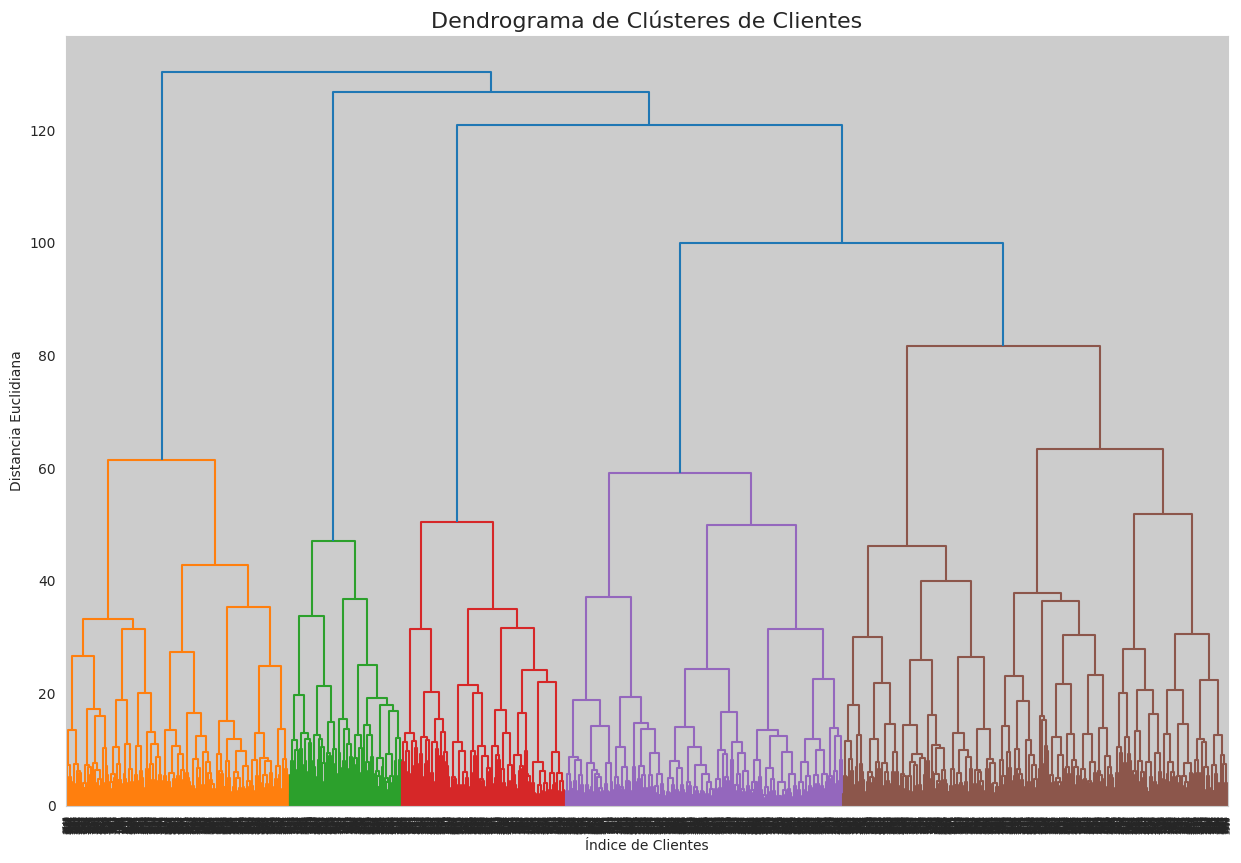

In [24]:
scaler_clustering = StandardScaler()
X_scaled_clustering = scaler_clustering.fit_transform(X)

linked = linkage(X_scaled_clustering, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top') 
plt.title('Dendrograma de Clústeres de Clientes', fontsize=16)
plt.xlabel('Índice de Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Podemos identificar claramente 5 clústeres principales, estas ramas que se mantiene separadas hasta que la distancia euclidiana es bastante alta, que es alrededor de 60-80 en el eje Y, y antes de que empiecen a unirse en fusiones más altas, nos representa un balance entre granularidad y manejabilidad, esto proporciona una buena segmentación manejando grupos pequeños, asi podremos mostrarle a Model Fitness los perfiles de clientes específicos, lo sustenta la claridad en la separación antes de fusionarse.
</div>

# Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [25]:
kmeans_model = KMeans(n_clusters=5, random_state=54321, n_init=10)
kmeans_model.fit(X_scaled_clustering)

clusters = kmeans_model.labels_

df_gym_clustered = df_gym.copy()
df_gym_clustered['cluster'] = clusters

print(df_gym_clustered.head())

print("\nConteo de clientes por clúster:")
print(df_gym_clustered['cluster'].value_counts())

   gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0  

# Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [26]:
cluster_mean_features = df_gym_clustered.groupby('cluster').mean()

print(cluster_mean_features)

           gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.495560       0.994671  0.970693       0.820604    1.0   
1        0.522693       1.000000  0.198941       0.085477    1.0   
2        0.501786       0.000000  0.487500       0.075000    1.0   
3        0.509901       1.000000  0.224422       0.061056    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
cluster                                             
0               8.055062      0.501776  29.541741   
1               1.000000      0.373676  28.837368   
2               3.005357      0.235714  28.728571   
3               7.930693      0.483498  29.625413   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                                  
0  

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
¿Hay algo que te llame la atención?
Las tasas de Churn son distintas, el detalle mas impactante es la clara diferenciación en las tasas de cancelación entre los clústeres, pues los Clústeres 0 y 3 son muy leales, mientras que los Clústeres 1 y 2 tienen un churn muy alto entre ~40-41% y el Clúster 4 se sitúa justo en la tasa de churn promedio.

Características que hacen una diferencia clave son contract_period y month_to_end_contract, son fundamentales, mientras que el Clúster 1 con un churn bastante alto, se define por contratos de 1 mes, los Clústeres 0 y 3 con un bajo churn tienen contratos largos; Paro el caso de lifetime, una menor antigüedad se asocia directamente con clústeres de mayor churn; Para near_location, el Clúster 2 se define de manera única por no vivir cerca del gimnasio y tiene un alto churn; Los casos de partner y promo_friends, en los clústeres 0 y 3 con un bajo churn, son beneficiados significativos de estos programas, mientras que los clústeres 1 y 3, que son ambos leales, difieren significativamente en esto; Para phone, el clúster 4 se define únicamente por no proporcionar un número de teléfono! ; Para avg_class_frequency_current_month, una menor frecuencia actual de clases se correlaciona con un mayor churn; Asi pues este análisis nos proporciona información práctica para Model Fitness, ahora podriamos adaptar estrategias y dirigir campañas de retención específicas a los Clústeres 1 y 2, fomentar contratos más largos, promover actividades grupales y tratar de mejorar el compromiso de los nuevos clientes.
</div>

# Traza distribuciones de características para los clústeres. ¿Notas algo?

----- Distribuciones de Características Numéricas por Clúster -----


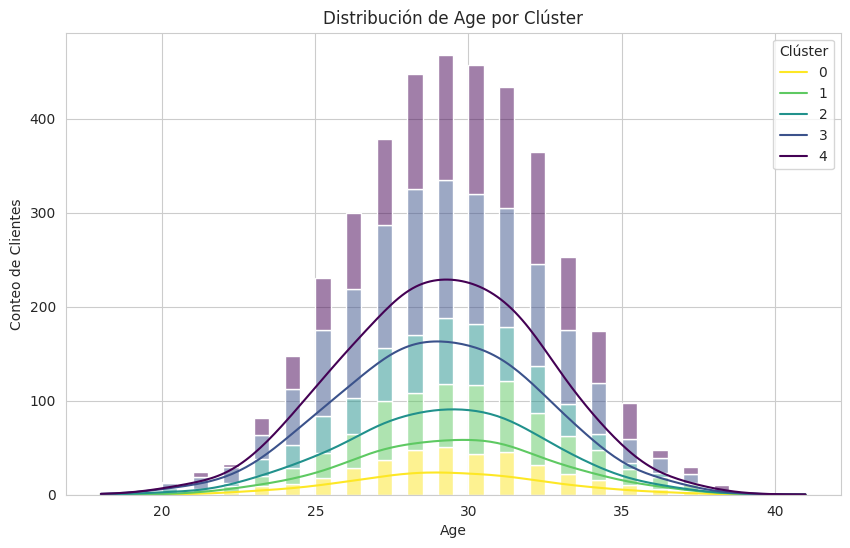

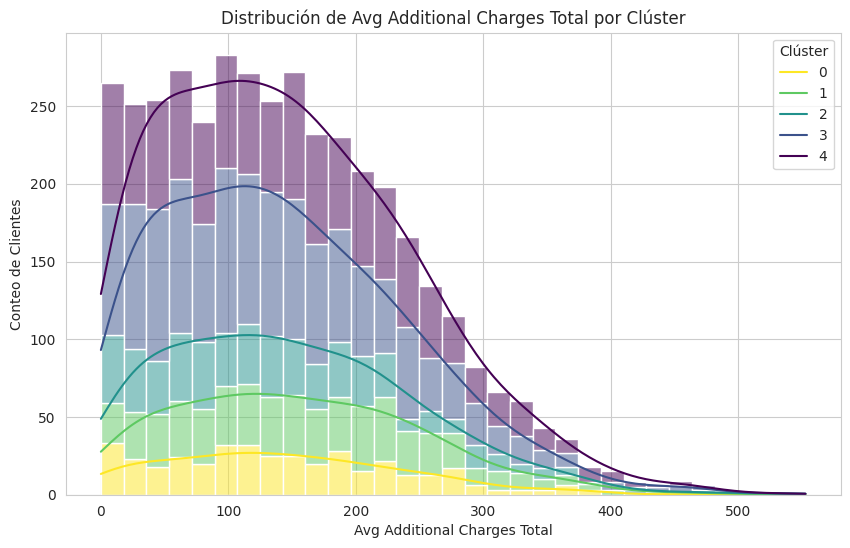

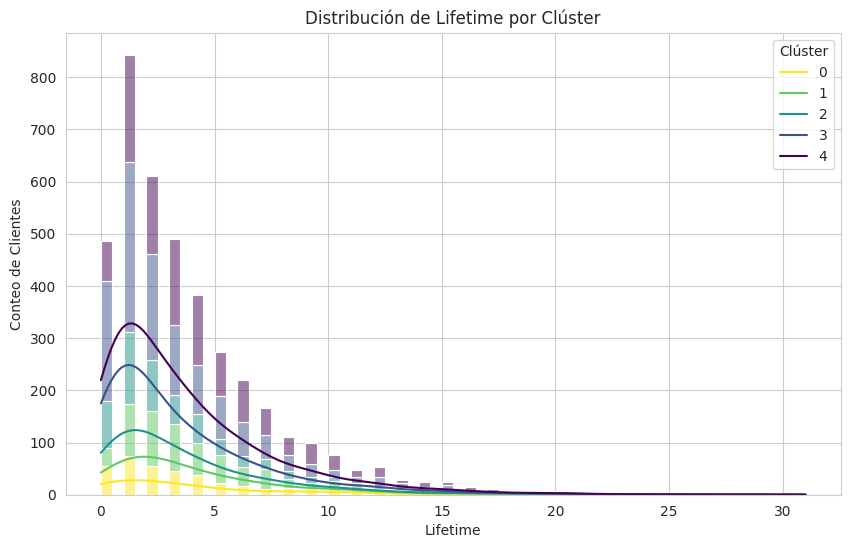

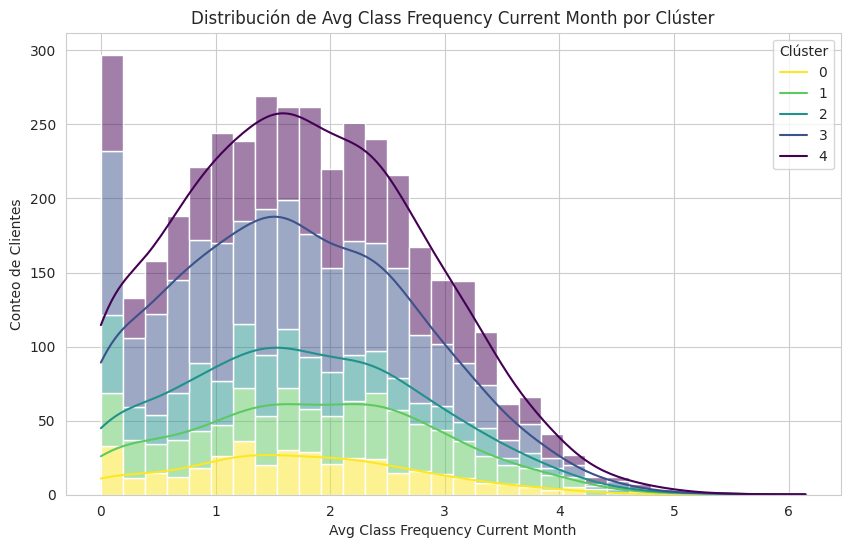

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


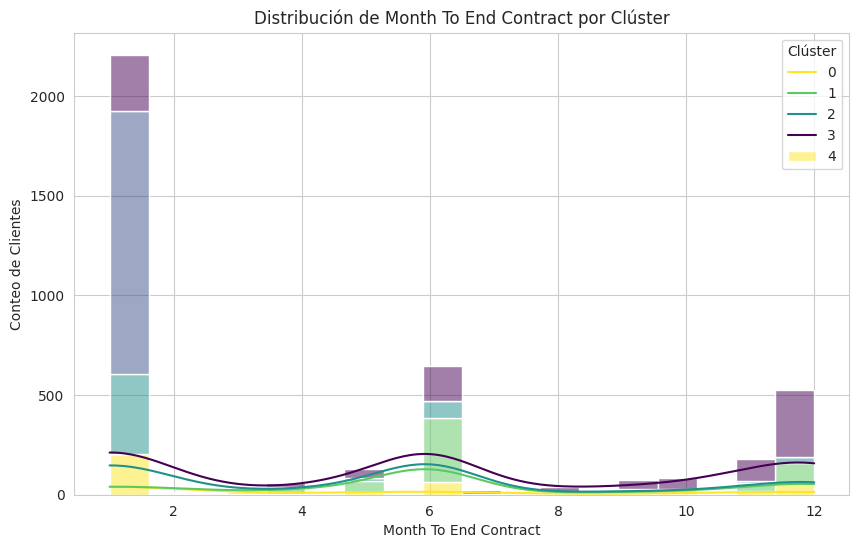


----- Distribuciones de Características Categóricas por Clúster -----


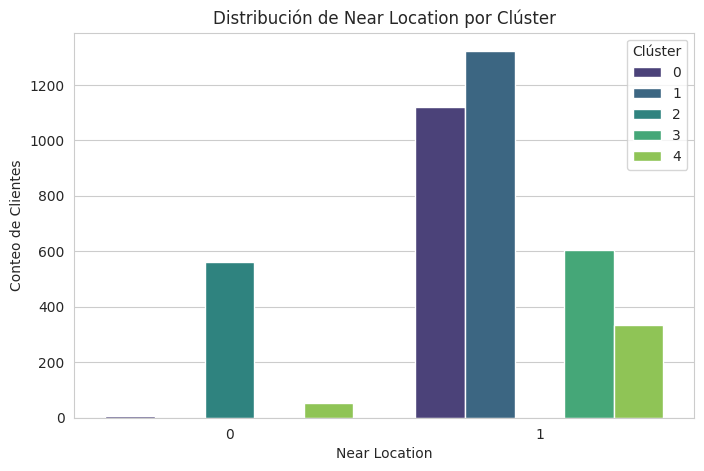

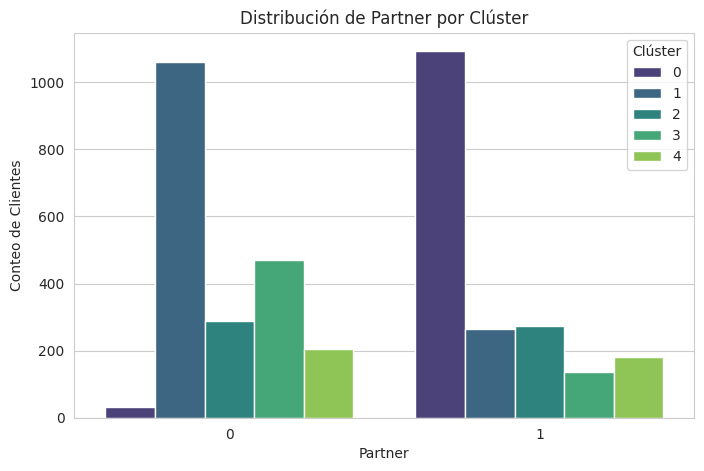

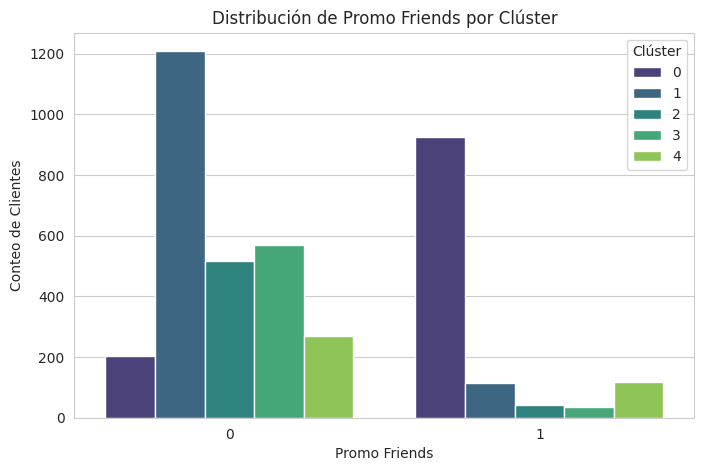

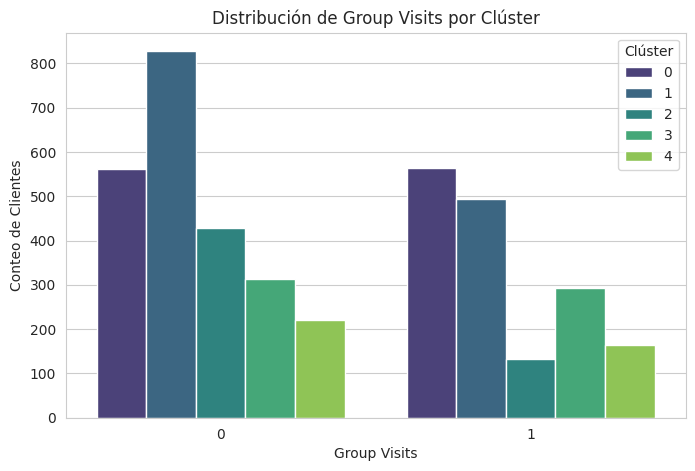

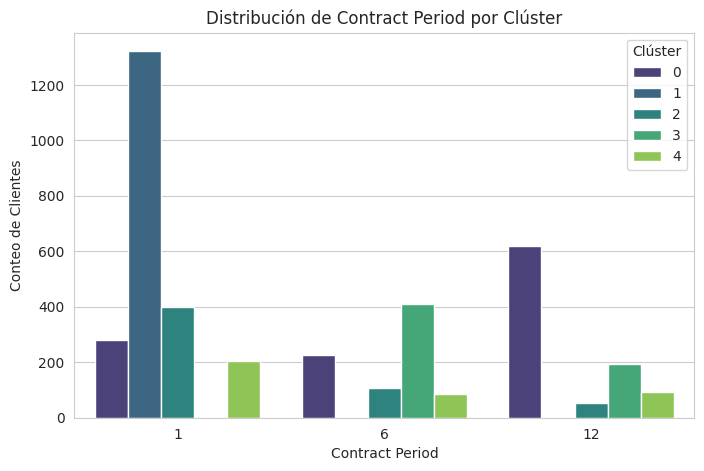

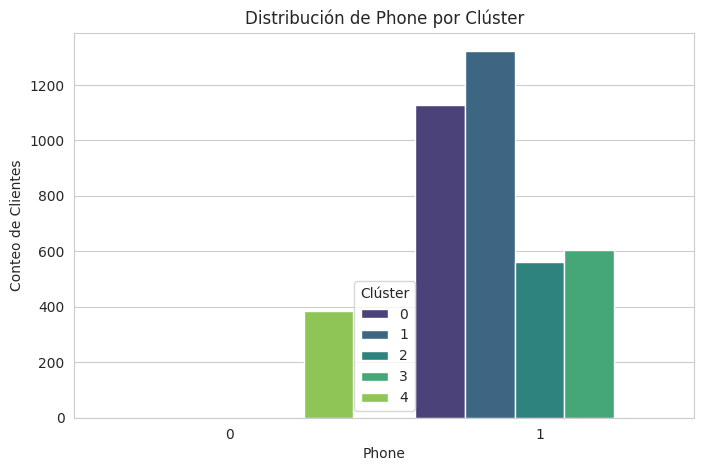

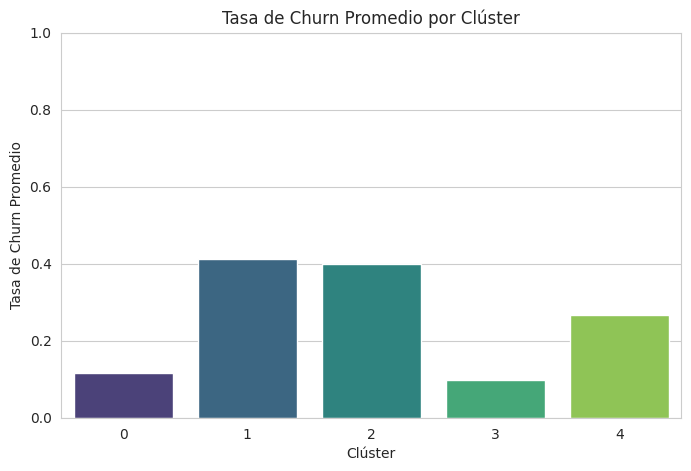

In [27]:
sns.set_style("whitegrid")

numeric_cols_to_plot = [
    'age',
    'avg_additional_charges_total',
    'lifetime',
    'avg_class_frequency_current_month',
    'month_to_end_contract' 
]

binary_categorical_cols_to_plot = [
    'near_location',
    'partner',
    'promo_friends',
    'group_visits',
    'contract_period', 
    'phone' 
]

print("----- Distribuciones de Características Numéricas por Clúster -----")
for col in numeric_cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_gym_clustered, x=col, hue='cluster', kde=True, palette='viridis', multiple='stack')
    plt.title(f'Distribución de {col.replace("_", " ").title()} por Clúster')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Conteo de Clientes')
    plt.legend(title='Clúster', labels=[str(i) for i in sorted(df_gym_clustered['cluster'].unique())]) 
    plt.show()

print("\n----- Distribuciones de Características Categóricas por Clúster -----")
for col in binary_categorical_cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_gym_clustered, x=col, hue='cluster', palette='viridis')
    plt.title(f'Distribución de {col.replace("_", " ").title()} por Clúster')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Conteo de Clientes')
    plt.legend(title='Clúster', labels=[str(i) for i in sorted(df_gym_clustered['cluster'].unique())]) 
    plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_gym_clustered.groupby('cluster')['churn'].mean().reset_index(),
            x='cluster', y='churn', palette='viridis')
plt.title('Tasa de Churn Promedio por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Churn Promedio')
plt.ylim(0, 1) 
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
¿Notas algo? si, las visualizaciones de histogramas y conteos por clúster, confirmaron y magnificaron las diferencias que habíamos notado en las tablas de medias, nos dejaron ver patrones "sesgados y puntuales" de manera inconfundible, lo que es invaluable para comprender a nuestros clientes.

Una clara delineación de perfiles de clientes, cada uno de los 5 clústeres no es solo un grupo aleatorio, sino un segmento de cliente con un perfil y un comportamiento distintivos basado en sus características.

Aunque no se incluyo churn en el algoritmo de clustering, esta variable churn resultó ser la métrica más potente para diferenciar la calidad de un clúster, puesto que los gráficos, en especial el de la tasa de churn por clúster y las medias, muestran cómo los clústeres se dividen naturalmente en grupos de alto riesgo de churn (Clústeres 1 y 2) y bajo riesgo de churn (Clústeres 0 y 3), con un clúster de riesgo promedio (Clúster 4).

Esta segmentación visualizada es una hoja de ruta directa para estrategias de negocio, en donde nos interesa tener una retención dirigida, ya que Model Fitness puede crear campañas específicas para los clústeres de alto churn, basándose en sus características distintivas, como por ejemplo podria sugerir ofrecer incentivos para extender contratos a los del Clúster 1, o servicios de conveniencia a los del Clúster 2; Optimizar el marketing, entendiendo que este impulsa la lealtad, esto para los clústeres 0 y 3, informando las campañas de adquisición para atraer a más clientes con esos perfiles; Identificar las deficiencias, en los casos de importancia de la ubicación para el Clúster 2, ya que podria llevar a mejorar la oferta o la comunicación y mejorar asi el servicio.
</div>

# Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [29]:
churn_rate_by_cluster = df_gym_clustered.groupby('cluster')['churn'].mean()

print("Tasa de Cancelación (Churn) Promedio por Clúster:")
print(churn_rate_by_cluster)

print("\n----- Tasa de Churn por Clúster (Ordenado) -----")
print(churn_rate_by_cluster.sort_values(ascending=False))

print("\n----- Conteo de Miembros por Clúster -----")
print(df_gym_clustered['cluster'].value_counts().sort_index())

Tasa de Cancelación (Churn) Promedio por Clúster:
cluster
0    0.116341
1    0.411498
2    0.400000
3    0.097360
4    0.266839
Name: churn, dtype: float64

----- Tasa de Churn por Clúster (Ordenado) -----
cluster
1    0.411498
2    0.400000
4    0.266839
0    0.116341
3    0.097360
Name: churn, dtype: float64

----- Conteo de Miembros por Clúster -----
0    1126
1    1322
2     560
3     606
4     386
Name: cluster, dtype: int64


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
¿Difieren en términos de tasa de cancelación? ¡Absolutamente sí, y de manera muy significativa! La diferencia entre las tasas de churn es enorme y evidente; ¿Qué grupos son propensos a irse y cuáles son leales? basados en las tasas de churn ordenadas, los Clústeres Propensos a Irse o Alto Churn serian Clúster 1: 41.15 % es el que tiene la mayor tasa de churn, en detalle son los "Suscriptores Mensuales de Alto Riesgo"; el clúster 2: 40.00 % también es una tasa de churn extremadamente alta, son los "que por no vivir cerca del gimnasio y tener menor engagement"; Clúster de Riesgo Promedio: 26.68 % es una tasa muy cercana a la tasa de churn promedio general del dataset, que es de alrededor del 26.5 % , de riesgo Promedio y menos accesibles, se definene por no dar el teléfono!; Clústeres Leales o bajo Churn: Clúster 0: 11.63 % uno de los clústers mas leales, son los definidos por su origen de socio/amigo y contratos largos; y finalmente el clúster 3: 9.74 % el clúster con la tasa de churn más baja, son los clientes Leales Orgánicos Altamente Comprometidos, serian como los del clúster 0 pero sin la influencia de socios/amigos.
</div>

# Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

# Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

# No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El análisis revela un churn del 26.5 %, con mayores riesgos en clientes nuevos, jóvenes, con contratos cortos y baja frecuencia de visitas, el modelo predictivo de Regresión Logística logró 93.8 % de exactitud, identificando patrones claves, asi mismo los 5 clústeres destacan dos grupos críticos, suscriptores mensuales y clientes distantes como tambien dos leales comprometidos con contratos largos.

Recomendaciones clave para las areas pertinentes:

Incentivar contratos largos en suscriptores mensuales con descuentos/beneficios.

Ofrecer opciones remotas como clases virtuales para clientes distantes.

Premiar la lealtad de clientes VIP con programas exclusivos.

Monitoreo proactivo usando el modelo para intervenciones tempranas.

Mejorar la comunicación con clientes inaccesibles a traves de email o una app.

El Objetivo principal seria reducir churn con estrategias personalizadas basadas en datos.
</div>